##### 20240521-박수진-풍속데이터변환 완료

### 패키지 설치

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

In [3]:
# 밑에 한글폰트 경로 설정에서 에러 떠서 추가했습니다.
# 한글 폰트 경로 설정
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#region 한글폰트 경로설정
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/SCDream3.otf" # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

#endregion


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream3.otf'

### 데이터 정리

In [4]:
train = pd.read_csv('elec_train.csv')

In [5]:
#region 1열 제거 및 열이름 변경
train1 = train
train1.columns = train.columns.str.replace('electric_train.', '', regex=False) 
train1 = train1.drop('Unnamed: 0', axis = 'columns') 
train1
#endregion

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593351,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593352,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593353,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [6]:
#region tm 년월일시로 변경 및 제거
tr = train1
tr['tm'] = pd.to_datetime(tr['tm'])

# '년', '월', '일', '시' 변수 생성
tr['year'] = tr['tm'].dt.year
tr['mon'] = tr['tm'].dt.month
tr['day'] = tr['tm'].dt.day
tr['hour'] = tr['tm'].dt.hour
tr = tr.loc[:, tr.columns != 'tm']
tr
#endregion

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,year,mon,day,hour
0,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1,1
1,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1,2
2,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1,3
3,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1,4
4,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022,12,31,20
7593351,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022,12,31,21
7593352,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022,12,31,22
7593353,20947,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57,2022,12,31,23


In [7]:
#region 고도데이터 병합
reg_aws = pd.read_csv('고도데이터.csv')
awsinfo = reg_aws[['지점번호', '지역', '위치']]
tr = tr.merge(awsinfo, left_on='stn', right_on='지점번호', how='left')
tr
#endregion

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,weekday,week_name,elec,year,mon,day,hour,지점번호,지역,위치
0,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,4,0,99.56,2021,1,1,1,884,서호,제주특별자치도 서귀포시 서호동
1,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,4,0,91.78,2021,1,1,2,884,서호,제주특별자치도 서귀포시 서호동
2,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,4,0,79.17,2021,1,1,3,884,서호,제주특별자치도 서귀포시 서호동
3,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,4,0,73.34,2021,1,1,4,884,서호,제주특별자치도 서귀포시 서호동
4,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,4,0,69.73,2021,1,1,5,884,서호,제주특별자치도 서귀포시 서호동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,5,1,130.74,2022,12,31,20,671,청호,강원특별자치도 속초시 조양동
7593351,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,5,1,131.18,2022,12,31,21,671,청호,강원특별자치도 속초시 조양동
7593352,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,5,1,129.33,2022,12,31,22,671,청호,강원특별자치도 속초시 조양동
7593353,20947,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,...,5,1,122.57,2022,12,31,23,671,청호,강원특별자치도 속초시 조양동


### 풍속 변수 확인

In [8]:
#음수값 확인
out_tr=tr[tr['nph_ws_10m']<0]
out_tr

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,weekday,week_name,elec,year,mon,day,hour,지점번호,지역,위치
91271,8994,24,12,261,7300,829.76,72.555118,18.5,84.1,-99.0,...,1,0,95.30,2022,5,31,0,261,해남,전라남도 해남군 해남읍 남천리
257879,10069,24,18,162,11850,1598.16,99.993815,16.1,71.1,-99.0,...,1,0,88.79,2022,5,31,0,162,통영,경상남도 통영시 정량동
259480,10069,17,18,162,11850,2647.24,99.993815,28.4,78.8,-99.0,...,4,0,147.08,2022,8,5,17,162,통영,경상남도 통영시 정량동
319271,10222,24,30,294,45150,5924.12,203.794753,16.6,75.6,-99.0,...,1,0,96.90,2022,5,31,0,294,거제,경상남도 거제시 장평동
320872,10222,17,30,294,45150,9505.56,203.794753,28.3,81.4,-99.0,...,4,0,155.48,2022,8,5,17,294,거제,경상남도 거제시 장평동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992363,18538,24,59,400,117100,16050.12,269.447610,17.6,77.4,-99.0,...,1,0,100.96,2022,5,31,0,400,강남,서울특별시 강남구 일원동
7447890,19611,24,19,104,27150,4040.36,215.649186,16.3,87.7,-99.0,...,1,0,98.61,2022,5,31,0,104,북강릉,강원특별자치도 강릉시 사천면 방동리
7474194,19612,24,19,524,47618,4098.12,225.043306,16.8,90.1,-99.0,...,1,0,95.84,2022,5,31,0,524,경포,강원특별자치도 강릉시 운정동
7509282,19741,24,24,101,28400,7287.40,314.118874,15.6,89.3,-99.0,...,1,0,96.66,2022,5,31,0,101,춘천,강원특별자치도 춘천시 우두동


In [9]:
# region음수값 -99만 있다고 보고 개수 확인
wsout=tr['nph_ws_10m'] == -99
wsout_index=tr[wsout].index
wsout_index
# endregion

Index([  91271,  257879,  259480,  319271,  320872,  345575,  347176,  485879,
        512183,  513784,
       ...
       4001972, 4168580, 4379012, 5098004, 5124308, 5992363, 7447890, 7474194,
       7509282, 7561890],
      dtype='int64', length=169)

In [10]:
len(wsout_index)

169

In [11]:
# -99 전후 데이터의 평균으로 대체하는 함수
def rplc_out(df, df_out, col):
    df_out_idx = df[df_out].index
    for idx in df_out_idx:
        if idx == 0 or idx == len(df) - 1:
            continue  # 첫 행이나 마지막 행 스킵(평균치 낼 수 없음)
    
        prev_val = df.at[idx - 1, col]
        next_val = df.at[idx + 1, col]
        
        # 둘 중 하나가 -99인 경우 건너뜀
        if prev_val == -99 or next_val == -99:
            continue
        
        # 평균값으로 대체
        mean_val = np.mean([prev_val, next_val])
        df.loc[idx, col] = mean_val

In [12]:
# 호출
rplc_out(tr, wsout, 'nph_ws_10m')

# 변경된 데이터프레임 확인
tr

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,weekday,week_name,elec,year,mon,day,hour,지점번호,지역,위치
0,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,4,0,99.56,2021,1,1,1,884,서호,제주특별자치도 서귀포시 서호동
1,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,4,0,91.78,2021,1,1,2,884,서호,제주특별자치도 서귀포시 서호동
2,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,4,0,79.17,2021,1,1,3,884,서호,제주특별자치도 서귀포시 서호동
3,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,4,0,73.34,2021,1,1,4,884,서호,제주특별자치도 서귀포시 서호동
4,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,4,0,69.73,2021,1,1,5,884,서호,제주특별자치도 서귀포시 서호동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,5,1,130.74,2022,12,31,20,671,청호,강원특별자치도 속초시 조양동
7593351,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,5,1,131.18,2022,12,31,21,671,청호,강원특별자치도 속초시 조양동
7593352,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,5,1,129.33,2022,12,31,22,671,청호,강원특별자치도 속초시 조양동
7593353,20947,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,...,5,1,122.57,2022,12,31,23,671,청호,강원특별자치도 속초시 조양동


In [13]:
tr[tr['nph_ws_10m']<0] #남아있는 음수값 확인

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,weekday,week_name,elec,year,mon,day,hour,지점번호,지역,위치


In [14]:
tr[wsout] #최종데이터 확인

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,weekday,week_name,elec,year,mon,day,hour,지점번호,지역,위치
91271,8994,24,12,261,7300,829.76,72.555118,18.5,84.1,2.15,...,1,0,95.30,2022,5,31,0,261,해남,전라남도 해남군 해남읍 남천리
257879,10069,24,18,162,11850,1598.16,99.993815,16.1,71.1,3.15,...,1,0,88.79,2022,5,31,0,162,통영,경상남도 통영시 정량동
259480,10069,17,18,162,11850,2647.24,99.993815,28.4,78.8,2.45,...,4,0,147.08,2022,8,5,17,162,통영,경상남도 통영시 정량동
319271,10222,24,30,294,45150,5924.12,203.794753,16.6,75.6,2.95,...,1,0,96.90,2022,5,31,0,294,거제,경상남도 거제시 장평동
320872,10222,17,30,294,45150,9505.56,203.794753,28.3,81.4,2.40,...,4,0,155.48,2022,8,5,17,294,거제,경상남도 거제시 장평동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992363,18538,24,59,400,117100,16050.12,269.447610,17.6,77.4,0.15,...,1,0,100.96,2022,5,31,0,400,강남,서울특별시 강남구 일원동
7447890,19611,24,19,104,27150,4040.36,215.649186,16.3,87.7,1.80,...,1,0,98.61,2022,5,31,0,104,북강릉,강원특별자치도 강릉시 사천면 방동리
7474194,19612,24,19,524,47618,4098.12,225.043306,16.8,90.1,2.95,...,1,0,95.84,2022,5,31,0,524,경포,강원특별자치도 강릉시 운정동
7509282,19741,24,24,101,28400,7287.40,314.118874,15.6,89.3,1.15,...,1,0,96.66,2022,5,31,0,101,춘천,강원특별자치도 춘천시 우두동


In [15]:
print("DataFrame의 열 이름:")
print(tr.columns)

DataFrame의 열 이름:
Index(['num', 'hh24', 'n', 'stn', 'sum_qctr', 'sum_load', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec', 'year', 'mon', 'day', 'hour', '지점번호', '지역', '위치'],
      dtype='object')


In [16]:
# 'electric_train.elec'이 음수인 행들 확인
negative_elec = tr[tr['elec'] < 0]

# 결과 출력
print("음수인 elec 값들:")
print(negative_elec)

음수인 elec 값들:
           num  hh24   n  stn  sum_qctr  sum_load  n_mean_load  nph_ta  \
1395082  11412    12  12  899     24700  12216.00   379.334179    11.5   
3026694  14258     9  13  138     38400  21310.52   444.963932    10.5   
3627062  15735    17  23  136     31240  27714.20   207.317978    26.4   
6092442  18680    23  40  511     43200  22398.00   190.687836     8.7   
7482518  19724    20  11   99     12200  20794.12   200.045791    18.2   

         nph_hm  nph_ws_10m  ...  weekday  week_name  elec  year  mon  day  \
1395082    48.4         1.6  ...        0          0 -99.0  2020    2   10   
3026694    62.3         5.7  ...        2          0 -99.0  2021    3   10   
3627062    45.3         2.5  ...        6          1 -99.0  2022    8   28   
6092442    92.0         0.4  ...        1          0 -99.0  2020   10   27   
7482518    74.7         4.8  ...        0          0 -99.0  2020    5   11   

         hour  지점번호    지역                  위치  
1395082    12   899  마산회원

In [17]:
# -99 값을 이전 행과 이후 행의 평균값으로 대체하는 함수
def replace_with_mean(series):
    for i in range(1, len(series) - 1):
        if series[i] == -99:
            series[i] = (series[i-1] + series[i+1]) / 2
    return series
# 첫번째 행이나 마지막행 없음, 연속된 -99값 존재x

# 'elec' 열에 대해 함수 적용
tr['elec'] = replace_with_mean(tr['elec'])

C:\Users\82106\AppData\Local\Temp\ipykernel_25548\3850402159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = (series[i-1] + series[i+1]) / 2
C:\Users\82106\AppData\Local\Temp\ipykernel_25548\3850402159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = (series[i-1] + series[i+1]) / 2
C:\Users\82106\AppData\Local\Temp\ipykernel_25548\3850402159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = 

In [18]:
# elec 값이 -99였던 행의 인덱스 리스트
indices = [1395082, 3026694, 3627062, 6092442, 7482518]

#'elec' 열 값 확인
for index in indices:
    elec_value = tr.at[index, 'elec']
    print(f"{index}의 'elec' 열 값: {elec_value}")

1395082의 'elec' 열 값: 85.73
3026694의 'elec' 열 값: 98.935
3627062의 'elec' 열 값: 97.45
6092442의 'elec' 열 값: 111.1
7482518의 'elec' 열 값: 115.095


# 변수 변환

In [19]:
# 데이터 확인
tr

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,weekday,week_name,elec,year,mon,day,hour,지점번호,지역,위치
0,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,4,0,99.56,2021,1,1,1,884,서호,제주특별자치도 서귀포시 서호동
1,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,4,0,91.78,2021,1,1,2,884,서호,제주특별자치도 서귀포시 서호동
2,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,4,0,79.17,2021,1,1,3,884,서호,제주특별자치도 서귀포시 서호동
3,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,4,0,73.34,2021,1,1,4,884,서호,제주특별자치도 서귀포시 서호동
4,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,4,0,69.73,2021,1,1,5,884,서호,제주특별자치도 서귀포시 서호동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,5,1,130.74,2022,12,31,20,671,청호,강원특별자치도 속초시 조양동
7593351,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,5,1,131.18,2022,12,31,21,671,청호,강원특별자치도 속초시 조양동
7593352,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,5,1,129.33,2022,12,31,22,671,청호,강원특별자치도 속초시 조양동
7593353,20947,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,...,5,1,122.57,2022,12,31,23,671,청호,강원특별자치도 속초시 조양동


In [22]:
# stn열과 지점번호열이 중복이므로 지점번호 열 삭제
tr = tr.drop(columns='지점번호')
tr

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,nph_ta_chi,weekday,week_name,elec,year,mon,day,hour,지역,위치
0,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,-1.0,4,0,99.56,2021,1,1,1,서호,제주특별자치도 서귀포시 서호동
1,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,-0.6,4,0,91.78,2021,1,1,2,서호,제주특별자치도 서귀포시 서호동
2,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,-1.3,4,0,79.17,2021,1,1,3,서호,제주특별자치도 서귀포시 서호동
3,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,-0.2,4,0,73.34,2021,1,1,4,서호,제주특별자치도 서귀포시 서호동
4,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,-0.8,4,0,69.73,2021,1,1,5,서호,제주특별자치도 서귀포시 서호동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,-0.4,5,1,130.74,2022,12,31,20,청호,강원특별자치도 속초시 조양동
7593351,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,-0.5,5,1,131.18,2022,12,31,21,청호,강원특별자치도 속초시 조양동
7593352,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,0.2,5,1,129.33,2022,12,31,22,청호,강원특별자치도 속초시 조양동
7593353,20947,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,...,0.3,5,1,122.57,2022,12,31,23,청호,강원특별자치도 속초시 조양동


In [31]:
numeric_col = []

# 열의 값이 숫자형인 column명 추출해서 list로 저장
for column in tr.columns:
    if pd.api.types.is_numeric_dtype(tr[column]):
        numeric_col.append(column)

numeric_col

['num',
 'hh24',
 'n',
 'stn',
 'sum_qctr',
 'sum_load',
 'n_mean_load',
 'nph_ta',
 'nph_hm',
 'nph_ws_10m',
 'nph_rn_60m',
 'nph_ta_chi',
 'weekday',
 'week_name',
 'elec',
 'year',
 'mon',
 'day',
 'hour']

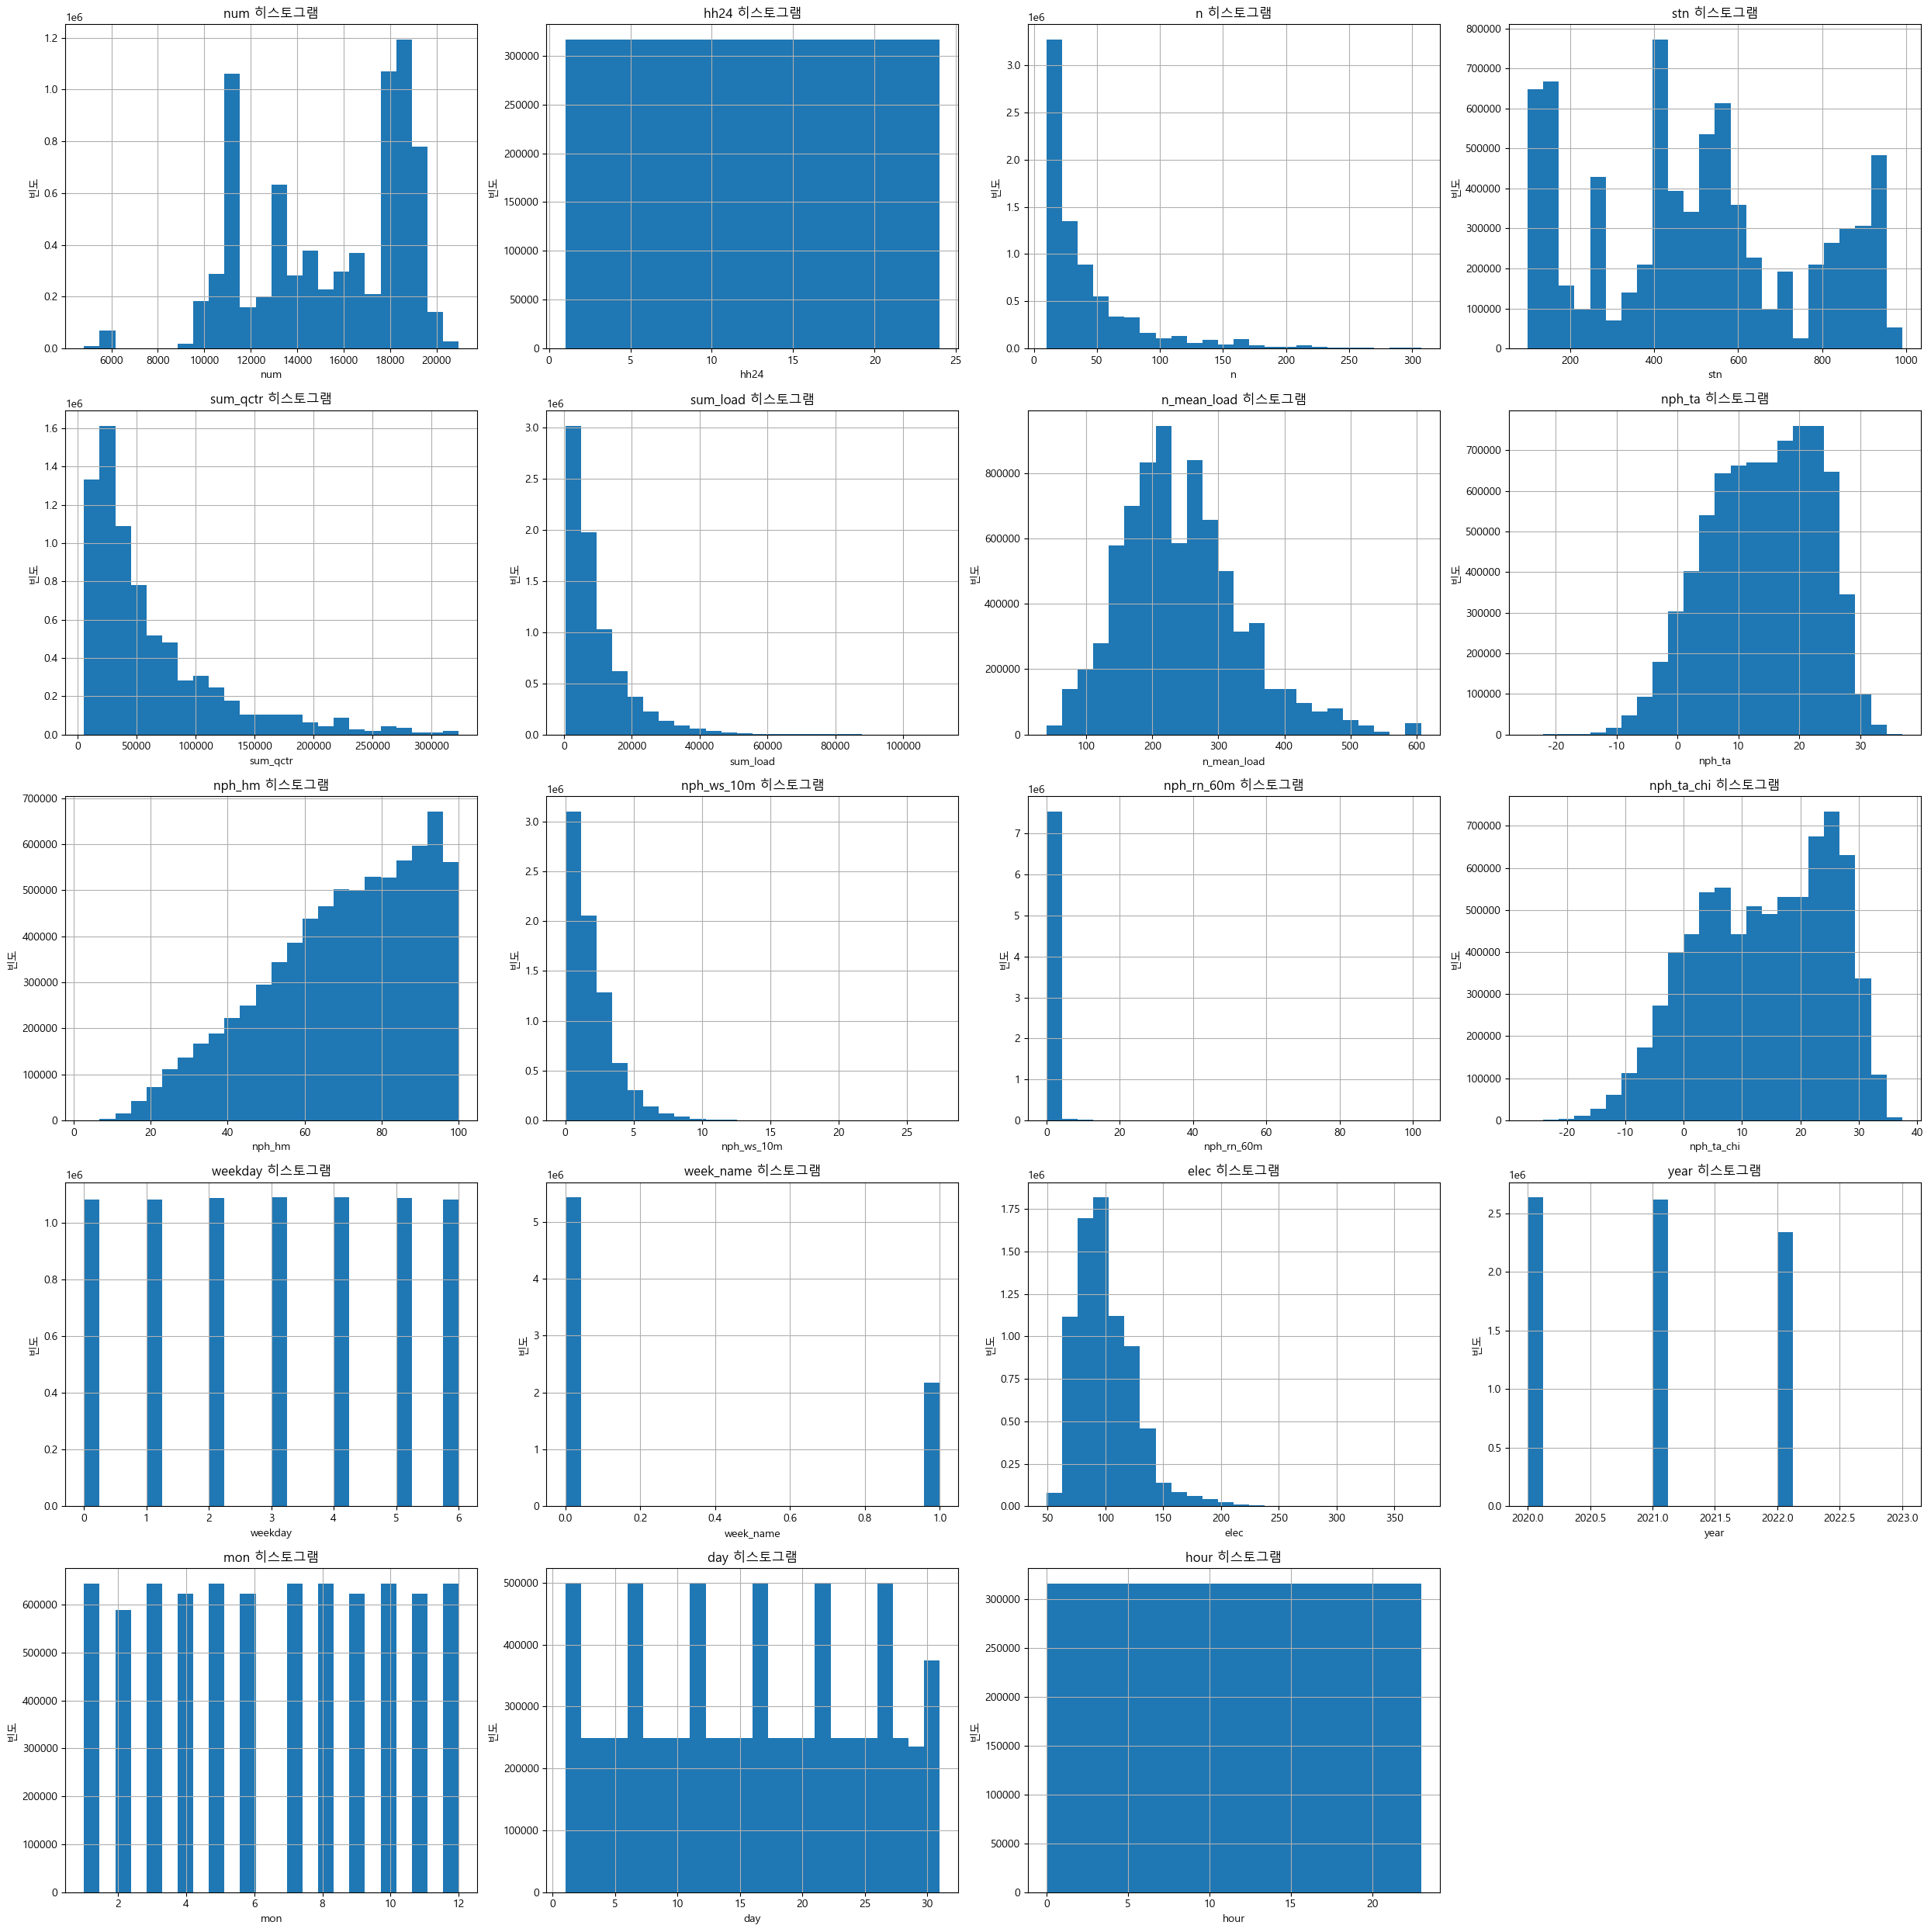

In [53]:
# col변수에 따른 hist로 분포 확인
def hist(train, column, i):
    plt.subplot(5, 4, i+1)
    train[column].hist(bins=24)
    plt.xlabel(column)
    plt.ylabel('빈도')
    plt.title(column + ' 히스토그램')

plt.figure(figsize=(25, 25))
for i in range(len(numeric_col)):
    hist(tr, numeric_col[i], i)

plt.tight_layout()
plt.show()

# n : 왼쪽으로 치우친 분포 -> 로그변환
# sum_qctr : 왼쪽으로 치우친 분포 -> 로그변환
# sum_load : 왼쪽으로 치우친 분포 -> 로그변환
# n_mean_load : 왼쪽으로 치우친 분포 -> 로그변환
# nph_ws_10m : 왼쪽으로 치우친 분포 -> 로그변환
# nph_rn_60m : 왼쪽으로 치우친 분포 -> 로그변환
# elec : 왼쪽으로 치우친 분포 -> 로그변환
# nph_hm : 오른쪽으로 치우친 분포 -> 제곱근변환

In [47]:
# tr 데이터 copy해서 train_trans 생성
train_trans = tr.copy()
train_trans

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,nph_ta_chi,weekday,week_name,elec,year,mon,day,hour,지역,위치
0,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,-1.0,4,0,99.56,2021,1,1,1,서호,제주특별자치도 서귀포시 서호동
1,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,-0.6,4,0,91.78,2021,1,1,2,서호,제주특별자치도 서귀포시 서호동
2,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,-1.3,4,0,79.17,2021,1,1,3,서호,제주특별자치도 서귀포시 서호동
3,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,-0.2,4,0,73.34,2021,1,1,4,서호,제주특별자치도 서귀포시 서호동
4,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,-0.8,4,0,69.73,2021,1,1,5,서호,제주특별자치도 서귀포시 서호동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,-0.4,5,1,130.74,2022,12,31,20,청호,강원특별자치도 속초시 조양동
7593351,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,-0.5,5,1,131.18,2022,12,31,21,청호,강원특별자치도 속초시 조양동
7593352,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,0.2,5,1,129.33,2022,12,31,22,청호,강원특별자치도 속초시 조양동
7593353,20947,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,...,0.3,5,1,122.57,2022,12,31,23,청호,강원특별자치도 속초시 조양동


In [48]:
# 변수 변환
train_trans['n'] = np.log1p(train_trans['n'])    # n 로그 변환
train_trans['sum_qctr'] = np.log1p(train_trans['sum_qctr'])     # sum_qctr 로그 변환
train_trans['sum_load'] = np.log1p(train_trans['sum_load'])     # sum_load 로그 변환
train_trans['n_mean_load'] = np.log1p(train_trans['n_mean_load'])    # sum_qctr 로그 변환
train_trans['nph_ws_10m'] = np.log1p(train_trans['nph_ws_10m'])     # nph_ws_10m 로그 변환
train_trans['nph_rn_60m'] = np.log1p(train_trans['nph_rn_60m'])     # nph_rn_60m 로그 변환
train_trans['elec'] = np.log1p(train_trans['elec'])     # elec 로그 변환
train_trans['nph_hm'] = np.sqrt(train_trans['nph_hm'])      # nph_hm 제곱근 변환
train_trans

,num,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,...,nph_ta_chi,weekday,week_name,elec,year,mon,day,hour,지역,위치
0,4821,1,2.484907,884,8.846641,6.623162,4.242857,2.2,7.918333,1.029619,...,-1.0,4,0,4.610755,2021,1,1,1,서호,제주특별자치도 서귀포시 서호동
1,4821,2,2.484907,884,8.846641,6.541895,4.242857,2.3,7.943551,1.131402,...,-0.6,4,0,4.530231,2021,1,1,2,서호,제주특별자치도 서귀포시 서호동
2,4821,3,2.484907,884,8.846641,6.394393,4.242857,2.2,7.899367,1.252763,...,-1.3,4,0,4.384149,2021,1,1,3,서호,제주특별자치도 서귀포시 서호동
3,4821,4,2.484907,884,8.846641,6.318031,4.242857,1.7,7.968689,0.993252,...,-0.2,4,0,4.308649,2021,1,1,4,서호,제주특별자치도 서귀포시 서호동
4,4821,5,2.484907,884,8.846641,6.267656,4.242857,1.7,7.937254,0.955511,...,-0.8,4,0,4.258870,2021,1,1,5,서호,제주특별자치도 서귀포시 서호동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,20,3.178054,671,10.440010,8.821856,5.422577,2.7,6.804410,1.410987,...,-0.4,5,1,4.880830,2022,12,31,20,청호,강원특별자치도 속초시 조양동
7593351,20947,21,3.178054,671,10.440010,8.825178,5.422577,2.6,6.841053,1.410987,...,-0.5,5,1,4.884165,2022,12,31,21,청호,강원특별자치도 속초시 조양동
7593352,20947,22,3.178054,671,10.440010,8.811008,5.422577,2.4,6.884766,1.131402,...,0.2,5,1,4.870070,2022,12,31,22,청호,강원특별자치도 속초시 조양동
7593353,20947,23,3.178054,671,10.440010,8.757293,5.422577,2.5,6.855655,1.131402,...,0.3,5,1,4.816808,2022,12,31,23,청호,강원특별자치도 속초시 조양동


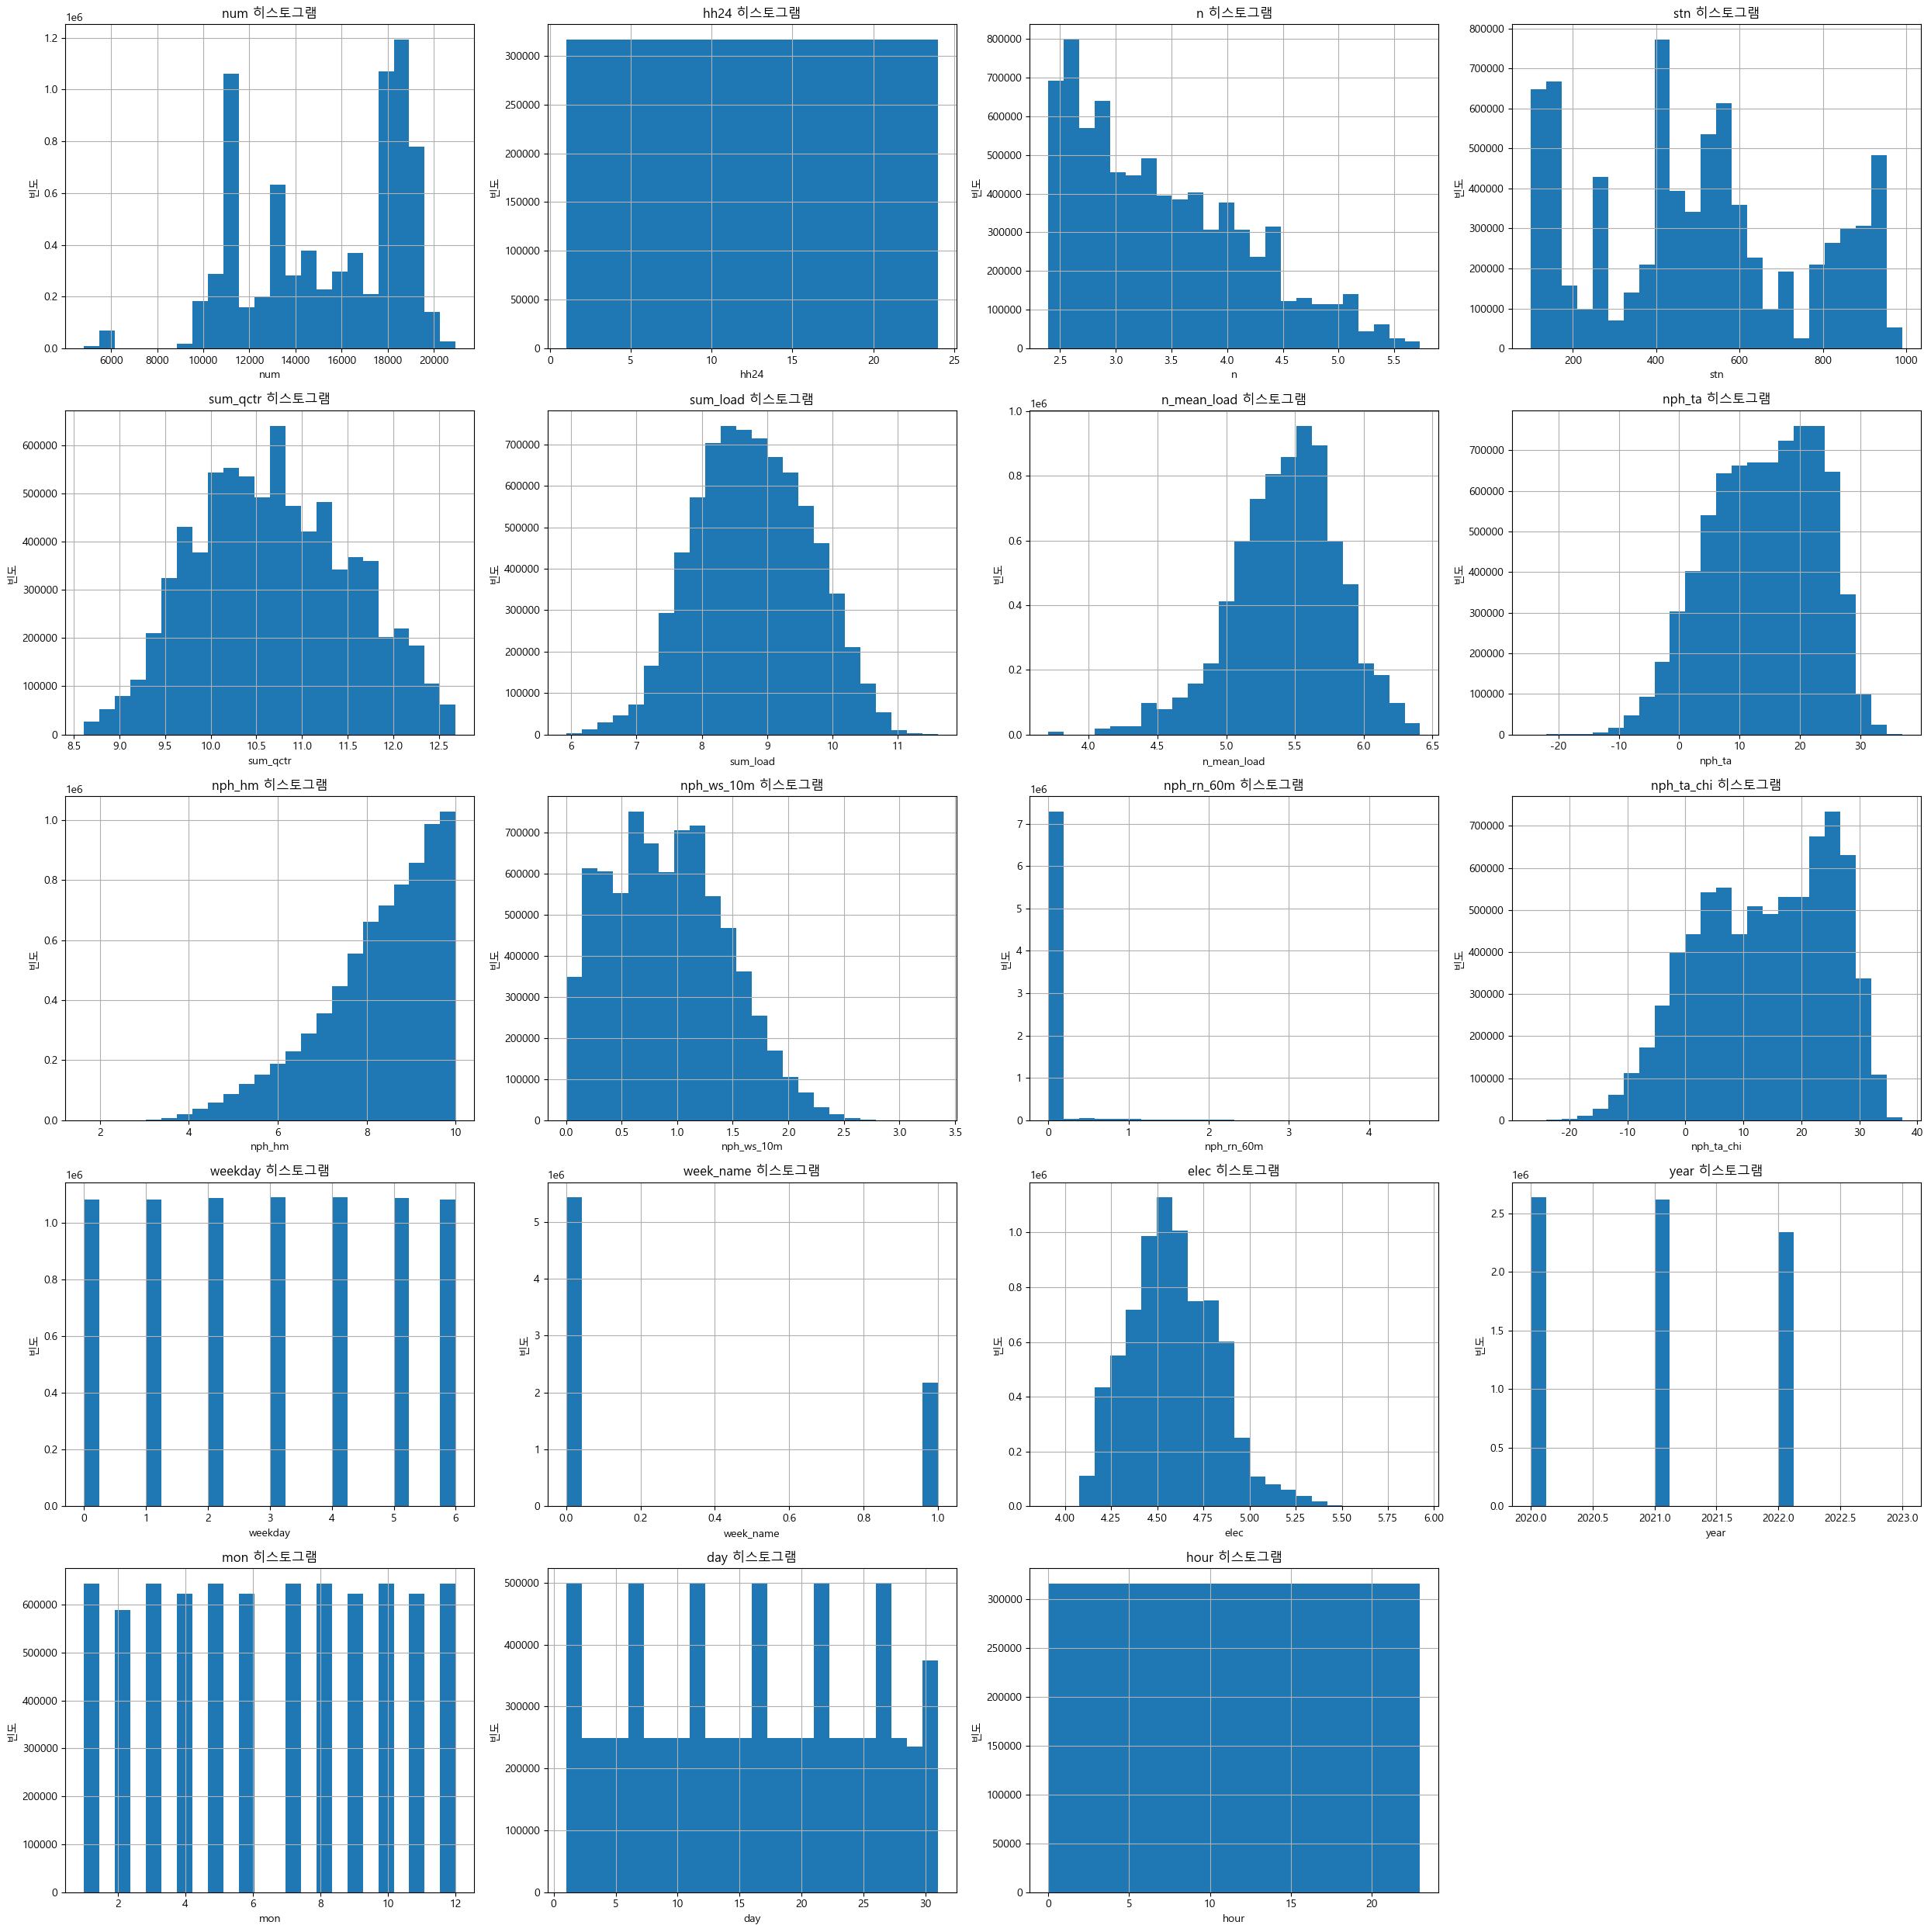

In [54]:
plt.figure(figsize=(25, 25))
for i in range(len(numeric_col)):
    hist(train_trans, numeric_col[i], i)

plt.tight_layout()
plt.show()